## Data

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [140]:
df = pd.read_csv('automobile.csv', header = None, na_values = '?')

In [141]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [142]:
df.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
              'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
              'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
              'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
              'highway_mpg', 'price']

## Preprocessing - Missing Values

In [143]:
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

##### Missing Values : normalized_losses Column

* method : fill with the global mean value

In [144]:
df['normalized_losses'] = df['normalized_losses'].fillna(value = df['normalized_losses'].mean())

##### Missing Values : num_of_doors Column

In [145]:
df[df['num_of_doors'].isnull() == True]['body_style']

27    sedan
63    sedan
Name: body_style, dtype: object

* Vehicles with missing number of doors informations are ALL SEDANS

In [146]:
# Let's have a look at the number of doors other sedans have
df[df['body_style'] == 'sedan']['num_of_doors'].value_counts()

num_of_doors
four    79
two     15
Name: count, dtype: int64

* Most of the sedans (84%) have four doors

In [147]:
# Let's also have a look at the length of these vehicles
df[df['num_of_doors'].isnull() == True]['length']

27    157.3
63    177.8
Name: length, dtype: float64

In [148]:
# Num_of_doors of vehicles which are sedan & have the same length as the missing value vehicle 27
df[(df['body_style'] == 'sedan') & (df['length'] == 157.3)]['num_of_doors'].value_counts()

num_of_doors
four    2
Name: count, dtype: int64

In [149]:
# Num_of_doors of vehicles which are sedan & have the same length as the missing value vehicle 63
df[(df['body_style'] == 'sedan') & (df['length'] == 177.8)]['num_of_doors'].value_counts()

num_of_doors
four    2
Name: count, dtype: int64

* After these features study, our vehicles data with missing num_of_doors value most likely has four doors
<br>
We will impute values of four doors for these data

In [150]:
df['num_of_doors'] = df['num_of_doors'].fillna(value = 'four')

##### Missing Values : bore & stroke Columns

In [151]:
df[df['bore'].isnull() == True]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [152]:
df[df['stroke'].isnull() == True]
# Bore and Stroke value is missing for the same vehicles

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [153]:
df['engine_size'].mean()
# These vehicles engine size is significantly smaller than the average engine size of the whole data set

126.90731707317073

In [154]:
df[df['engine_type'] == 'rotor']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


* Also, engine type 'rotor' is only for these four vehicles 
<br>
Since we have a proof that it is a pretty special type of engine in our data set, 
<br>
we can assume : That the measurement of bore and stroke does not apply to this type of engines

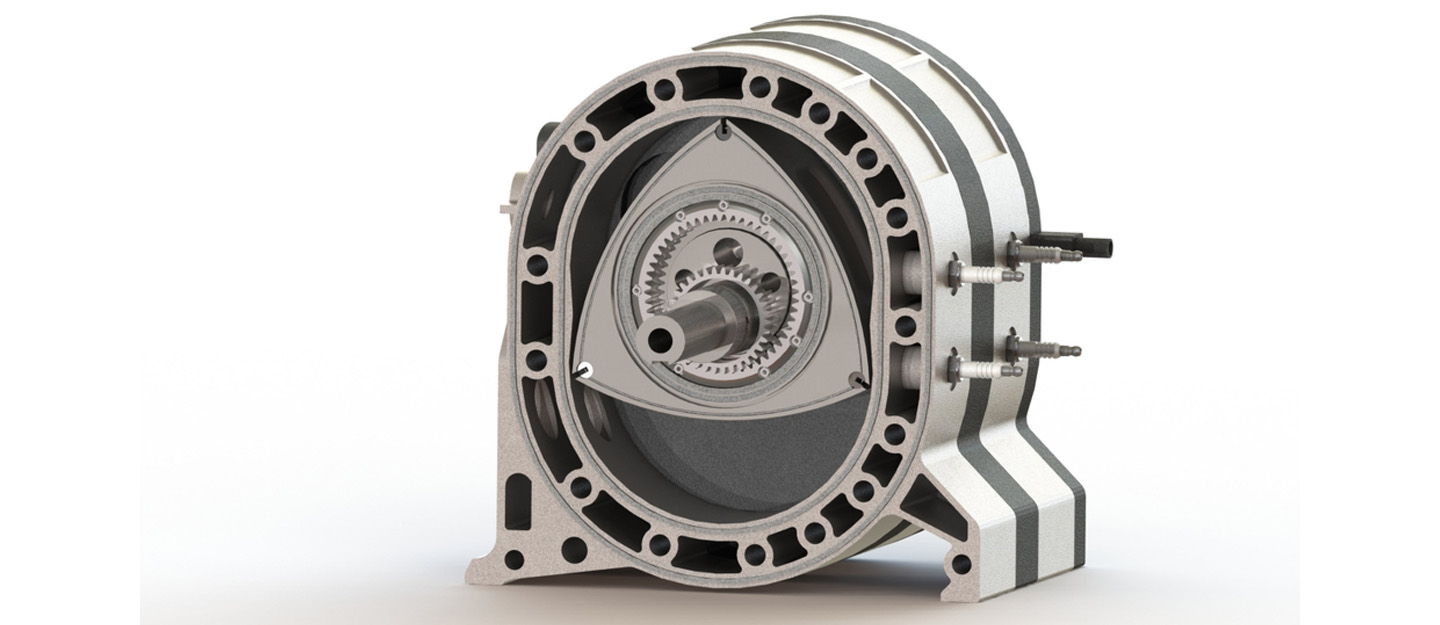

In [155]:
from IPython.display import Image
url = 'https://d2hucwwplm5rxi.cloudfront.net/wp-content/uploads/2021/11/08063829/rotary-engine-cover-081120211130.jpg'
Image (url, width = 500, height = 500)

* Above is an Image of an rotor engine,
<br>
Bore is defined by : the diameter of each cylinder in a piston engine
<br>
Stroke is defined by : the full travel of the piston along the cylinder, in either direction

* Bore and Stroke measurement is NOT appropriate for rotor type of engine, 
<br>
We will drop these vehicle values in order not to disrupt data integrity

In [156]:
df.dropna(subset = ['bore', 'stroke'], inplace = True)

##### Missing Values : hoursepower & peak_rpm column

In [157]:
df[df['horsepower'].isnull() == True]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [158]:
df[df['peak_rpm'].isnull() == True]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


* Again, missing values for hoursepower and peak rpm (since these two values are related),
<br>
are the same vehicles,
<br>
our missing values (2 entries) are 1% of our data, we will drop these datas in order to protect the data integrity
<br>
by not inserting random values

In [159]:
df.dropna(subset = ['horsepower', 'peak_rpm'], inplace = True)

##### Missing Values : price column

In [160]:
df[df['price'].isnull() == True]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


* This is a target value, we will NOT impute a value,
<br>
Drop these null values

In [161]:
df.dropna(subset = ['price'], inplace = True)

In [162]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Preprocessing - Unnecessary Columns

* This data is made for insurance purposes, symboling and normalized_losses columns were
<br>
related to insurance assessement.
<br>
In this study, we will not need them to predict the vehicle price

In [163]:
df.drop(['symboling', 'normalized_losses'], axis = 1, inplace = True)

## Preprocessing - Encode Categorical Values

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               195 non-null    object 
 1   fuel_type          195 non-null    object 
 2   aspiration         195 non-null    object 
 3   num_of_doors       195 non-null    object 
 4   body_style         195 non-null    object 
 5   drive_wheels       195 non-null    object 
 6   engine_location    195 non-null    object 
 7   wheel_base         195 non-null    float64
 8   length             195 non-null    float64
 9   width              195 non-null    float64
 10  height             195 non-null    float64
 11  curb_weight        195 non-null    int64  
 12  engine_type        195 non-null    object 
 13  num_of_cylinders   195 non-null    object 
 14  engine_size        195 non-null    int64  
 15  fuel_system        195 non-null    object 
 16  bore               195 non-null

##### Number of Cylinders column

In [165]:
df['num_of_cylinders'].value_counts()

num_of_cylinders
four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: count, dtype: int64

In [166]:
df['num_of_cylinders'].replace(to_replace = 'four', value = 4, inplace = True)
df['num_of_cylinders'].replace(to_replace = 'six', value = 6, inplace = True)
df['num_of_cylinders'].replace(to_replace = 'five', value = 5, inplace = True)
df['num_of_cylinders'].replace(to_replace = 'eight', value = 8, inplace = True)
df['num_of_cylinders'].replace(to_replace = 'two', value = 2, inplace = True)
df['num_of_cylinders'].replace(to_replace = 'three', value = 3, inplace = True)
df['num_of_cylinders'].replace(to_replace = 'twelve', value = 12, inplace = True)

##### Number of Doors Column

In [167]:
df['num_of_doors'].value_counts()

num_of_doors
four    114
two      81
Name: count, dtype: int64

In [168]:
df['num_of_doors'].replace(to_replace = 'four', value = 4, inplace = True)
df['num_of_doors'].replace(to_replace = 'two', value = 2, inplace = True)

##### Other Columns

In [169]:
fuel = pd.get_dummies(df['fuel_type'], dtype = float, drop_first = True)
aspiration = pd.get_dummies(df['aspiration'], dtype = float, drop_first = True)
body = pd.get_dummies(df['body_style'], dtype = float, drop_first = True)
wheel = pd.get_dummies(df['drive_wheels'], dtype = float, drop_first = True)
etype = pd.get_dummies(df['engine_type'], dtype = float, drop_first = True)
system = pd.get_dummies(df['fuel_system'], dtype = float, drop_first = True)
make = pd.get_dummies(df['make'], dtype = float, drop_first = True)
e_loc = pd.get_dummies(df['engine_location'], dtype = float, drop_first = True)

In [170]:
df.drop(['fuel_type', 'aspiration', 'body_style', 'drive_wheels', 'engine_type', 'fuel_system', 'make', 'engine_location'], axis = 1, inplace = True)

In [171]:
df = pd.concat([df, fuel, aspiration, body, wheel, etype, system, make, e_loc], axis = 1)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_of_doors       195 non-null    int64  
 1   wheel_base         195 non-null    float64
 2   length             195 non-null    float64
 3   width              195 non-null    float64
 4   height             195 non-null    float64
 5   curb_weight        195 non-null    int64  
 6   num_of_cylinders   195 non-null    int64  
 7   engine_size        195 non-null    int64  
 8   bore               195 non-null    float64
 9   stroke             195 non-null    float64
 10  compression_ratio  195 non-null    float64
 11  horsepower         195 non-null    float64
 12  peak_rpm           195 non-null    float64
 13  city_mpg           195 non-null    int64  
 14  highway_mpg        195 non-null    int64  
 15  price              195 non-null    float64
 16  gas                195 non-null

## 1/ Linear Regression

In [173]:
X = df.drop('price', axis = 1)
y = df['price']

##### Set Split

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

##### Model

In [175]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

##### Prediction

In [176]:
y_pred = lr.predict(X_test)

In [177]:
actual = np.array(y_test)
np.set_printoptions(precision = 0)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), actual.reshape(len(actual), 1)), 1))

[[ 7465. 10295.]
 [ 9673.  8948.]
 [29658. 28248.]
 [ 7840.  6529.]
 [14045. 12170.]
 [16653. 18620.]
 [ 6727.  6488.]
 [11019.  6785.]
 [ 7527.  7295.]
 [12416. 11900.]
 [ 7213.  7609.]
 [ 7997.  7957.]
 [43411. 40960.]
 [ 8345.  7995.]
 [ 4832.  7898.]
 [ 7062.  6095.]
 [ 6114.  7999.]
 [ 8917.  9095.]
 [ 9258.  7126.]
 [23437. 22018.]
 [23875. 21105.]
 [17926. 15998.]
 [16145. 13499.]
 [ 8211.  7775.]
 [11648. 10245.]
 [ 9443. 11248.]
 [11967. 11199.]
 [15610. 10345.]
 [ 7825.  8499.]
 [ 5808.  5399.]
 [11607. 11259.]
 [ 8070.  7957.]
 [35030. 34184.]
 [ 6826.  8058.]
 [ 7046.  9538.]
 [36132. 36880.]
 [ 7400.  8249.]
 [10595. 11694.]
 [17150. 17950.]]


##### Evaluation

In [178]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [179]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9550035861649093


In [180]:
coeffs = pd.DataFrame(lr.coef_, X.columns, columns = ['Coefficient']).sort_values('Coefficient', ascending = False)
coeffs

,Coefficient
idi,7134.121962
bmw,6138.601442
rear,5972.662178
porsche,5972.662178
2bbl,5635.502382
l,5274.151587
spdi,4441.711568
mpfi,4397.681291
mfi,3422.131810
mercedes-benz,2489.150651


#### Visualisation

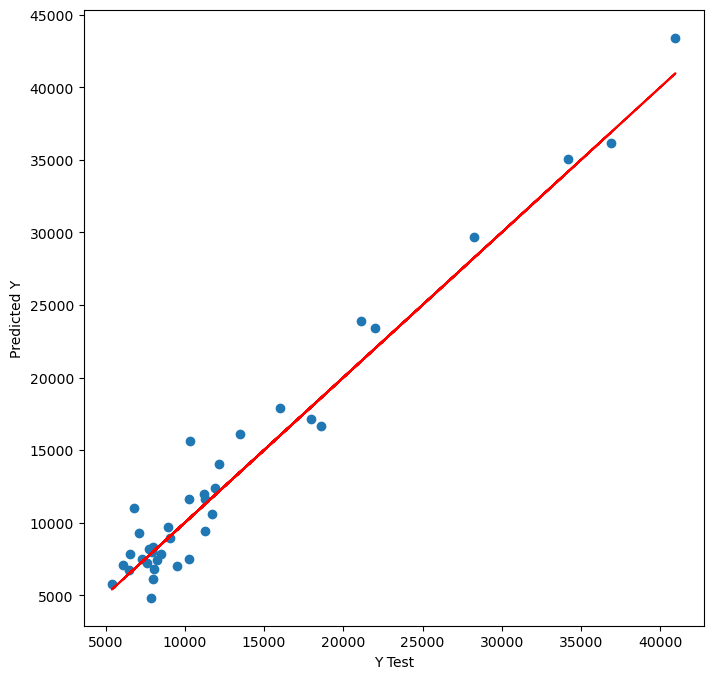

In [181]:
plt.rcParams['figure.figsize'] = 8, 8
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color = 'red')     # Perfect Prediction Line

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

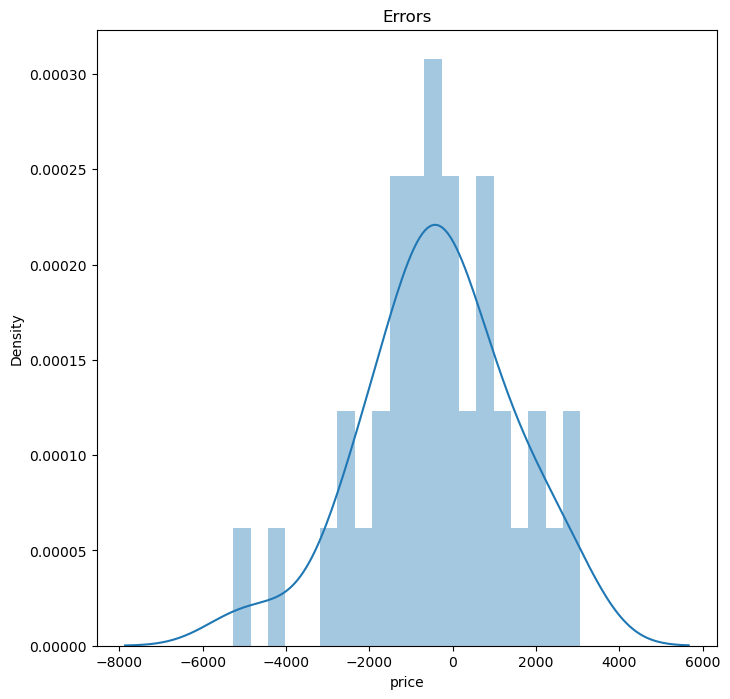

In [182]:
sns.distplot((y_test - y_pred), bins = 20)

plt.title('Errors')
plt.show()

## 2/ Artificial Neural Network

##### Feature Scaling

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Model

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [186]:
ann = Sequential()

ann.add(Dense(4, activation = 'relu'))
ann.add(Dense(4, activation = 'relu'))
ann.add(Dense(4, activation = 'relu'))

ann.add(Dense(1))

ann.compile(optimizer = 'adam', loss = 'mse')

In [187]:
ann.fit(X_train, y_train, epochs = 500, verbose = 0)

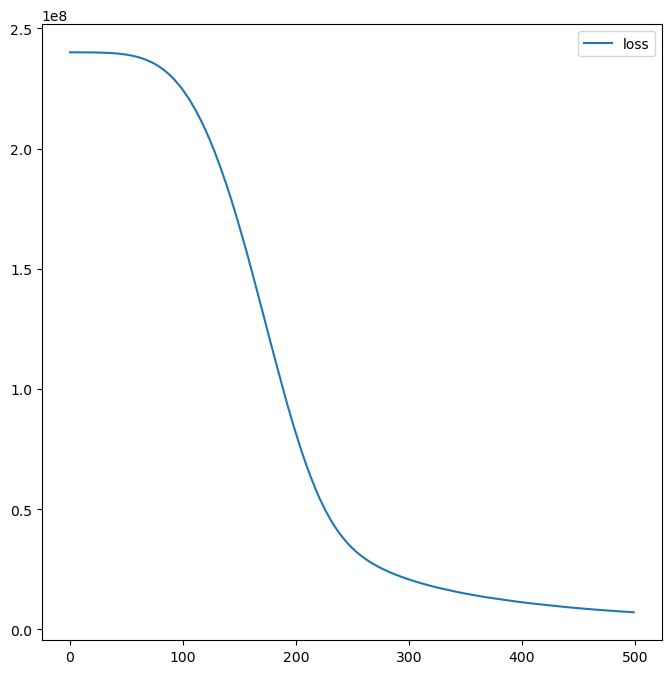

In [188]:
loss_df = pd.DataFrame(ann.history.history)
loss_df.plot()

plt.show()

##### Prediction

In [189]:
y_pred = ann.predict(X_test)

2/2 [==============================] - 0s 12ms/step


In [190]:
y_pred = pd.Series(y_pred.reshape(39, ))

In [191]:
y_test_new = y_test.reset_index()
y_test_new.drop('index', axis = 1, inplace = True)
y_test_new.columns = ['True Y']

In [192]:
pred_df = pd.concat([y_pred, y_test_new], axis = 1)
pred_df.columns = ['Predicted Y', 'True Y']

##### Evaluation

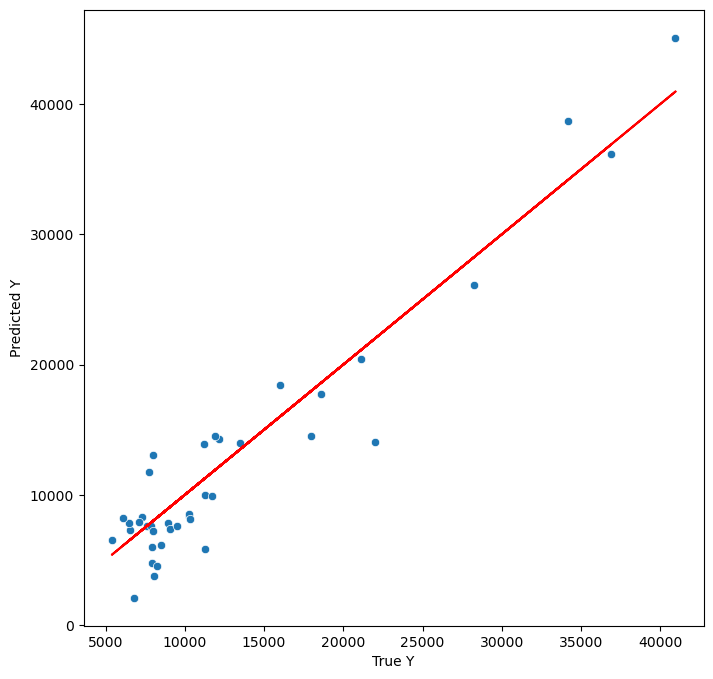

In [193]:
sns.scatterplot(pred_df, x = 'True Y', y = 'Predicted Y')
plt.plot(y_test, y_test, 'r')
plt.show()

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [195]:
mean_absolute_error(pred_df['True Y'], pred_df['Predicted Y'])

2341.0562963241186

In [196]:
df['price'].mean()  # We are 18% off

13248.015384615384

In [197]:
mean_squared_error(pred_df['True Y'], pred_df['Predicted Y'])

8282145.8561975425

In [198]:
np.sqrt(mean_squared_error(pred_df['True Y'], pred_df['Predicted Y']))

2877.8717581222313